https://www.kaggle.com/ybyraynagmanov/gs-stock-data-analysis-prediction-model-using-lstm?scriptVersionId=77585142<meta name="title" property="og:title" content="GS Stoc Data Analysis">


<meta property="og:type" content="Program">


<meta name="image" property="og:image" content="https://www.kaggle.com/ybyraynagmanov/gs-stock-data-analysis-prediction-model-using-lstm">


<meta name="description" property="og:description" content="https://pbs.twimg.com/profile_images/1286311065966579713/JNU4bWC8_400x400.png">


<meta name="author" content="Ybyray Nagmanov">

# GS Stock Data Analysis + Prediction using LSTM

#### **About me**: *My name is Ybyray "Ray" Nagmanov and I am a senior at Purdue University studying Industrial Engineering. After getting 4th place at a Case competition hosted by Accenture and GM, I have discovered my passion for Data Analytics. Over the summer I have successfully passed Google Data Analytics Certification, which made me want to learn more about Data Analytics. I started learning Python, R, and SQL in my free time, and in my opinion, I have made good progress in a short period of time. Since I am an international student securing a job opportunity is my highest priority right now. I will share my LinkedIn profile, please leave comments, suggestions and connect with me: www.linkedin.com/in/ybyray-nagmanov*
 
#### **Description: This program uses artificial recurent neural network called Long Short Term Memory (LSTM) to predict closing price of the Goldman Sachs stock price data. I will use 180 days stock price from data set provided by Goldman Sachs.**
#### *Import necessary libraries*
```python
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import random
random.seed(10)
```
#### **Upload data**
```python
df = pd.read_csv("../input/goldman-sachs-stock-data-updated-till-1jul2021/GS.csv")
print(df)
```
##### Getting rid of all NA values as well as reshaping dataframe so that Date column is easier to access.
###### Original data frame did not have date column, as a seperate attribute.
```python
df.isna().sum()
pd.set_option
("display.float","{:.2f}".format)
df.describe()
dates = df.index
df = df.reset_index() # Reset index colum
dates = df['Date']
```
# **Year 2021 Data Analysis**
##### Create a new subset of data that only contains data from year 2021
```python
df_filtered = df[(df.Date >= '2021-01-01') & (df.Date <= '2021-10-14')]
df_filtered = df_filtered.reset_index()
print(df_filtered)
print("Start Date : ",df_filtered.Date.min())
print("End Date   : ",df_filtered.Date.max())
df_filtered.describe()
```
##### Get summary on data from year 2021
######       Open    High    Low     Close    Adj Close        Volume
###### mean	 355.24	 359.31	 351.27	 355.50 	353.31	    2805812.63
```python
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(df_filtered.Close - df_filtered["Adj Close"])))
print("\n\nDistribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(df_filtered.Close - df_filtered['Adj Close'])))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(df_filtered.Date.size)),df_filtered.Close,label="Close")
plt.plot(list(range(df_filtered.Date.size)),df_filtered['Adj Close'],label="Adj Close")
plt.tick_params(bottom=False,left=False)
plt.title("Close vs Adj Close for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,df_filtered.Close.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()
print("Highest Closing Price Date : ",df_filtered[df_filtered.Close == df_filtered.Close.max()].Date.values[0])
print("Highest Adj Closing Price Date : ",df_filtered[df_filtered['Adj Close'] == max(df_filtered['Adj Close'])].Date.values[0])
print("Lowest Closing Price Date  : ",df_filtered[df_filtered.Close == df_filtered.Close.min()].Date.values[0])
print("Lowest Adj Closing Price Date  : ",df_filtered[df_filtered['Adj Close'] == min(df_filtered['Adj Close'])].Date.values[0])
```
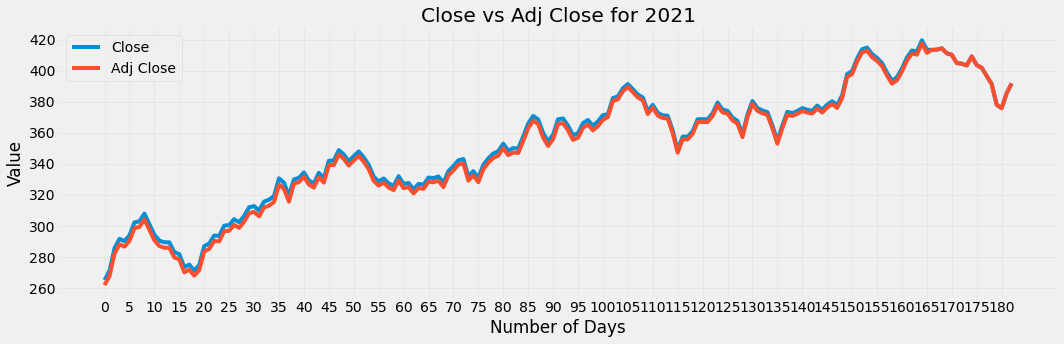

#### Distribution Variance for Close vs Adj Close
#####   Highest Closing Price: 419.69
#####   Highest Adj Closing price: 417.66
#####   Lowest Closing Price: 265.00
#####   Lowest Adj Closing Price: 261.80
```python
print("\n\nDistribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(df_filtered.Open - df_filtered.Close)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(df_filtered.Date.size)),df_filtered.Open,label="Open")
plt.plot(list(range(df_filtered.Date.size)),df_filtered.Close,label="Close")
plt.tick_params(bottom=False,left=False)
plt.title("Open vs Close for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,df_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()

print("Highest Opening Price Date : ",df_filtered[df_filtered.Open == df_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",df_filtered[df_filtered.Close == df_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",df_filtered[df_filtered.Open == df_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",df_filtered[df_filtered.Close == df_filtered.Close.min()].Date.values[0])
```
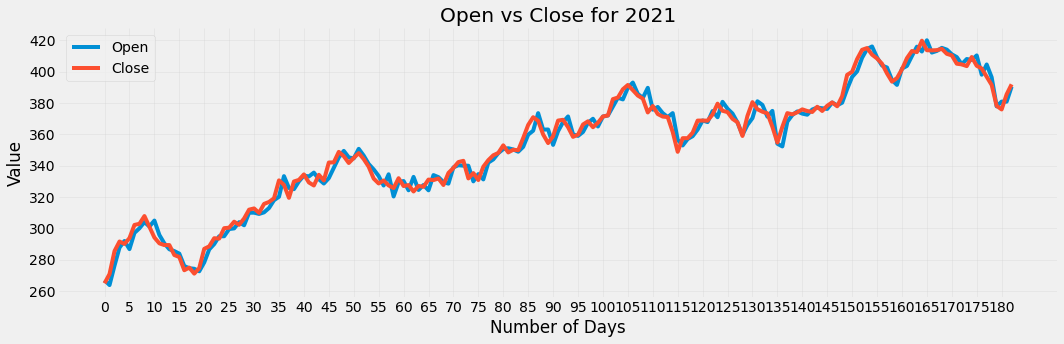

##### **Inference**: A higher opening price was observedc on 2021-08-30, while higher closing price was observed on 2021-81-27. Relatively low opening price was observed on 2021-01-05 and low closing price on 2021-01-04. Distribution Varience of 67.21 tells taht Open and Close price may vary numerically.
```python
print("\n\nDistribution Variance for High vs Low   : {:.2f}".format(np.linalg.norm(df_filtered.High - df_filtered.Low)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(df_filtered.Date.size)),df_filtered.High,label="High")
plt.plot(list(range(df_filtered.Date.size)),df_filtered.Low,label="Low")
plt.tick_params(bottom=False,left=False)
plt.title("High vs Low for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,df_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()
print("Peak High Price Date    : ",df_filtered[df_filtered.High == df_filtered.High.max()].Date.values[0])
print(df_filtered.High.max())
print("Peak Low Price Date     : ",df_filtered[df_filtered.Low == df_filtered.Low.max()].Date.values[0])
print(df_filtered.Low.max())
print("Lowest High Price Date  : ",df_filtered[df_filtered.High == df_filtered.High.min()].Date.values[0])
print(df_filtered.High.min())
print("Lowest Low Price Date   : ",df_filtered[df_filtered.Low == df_filtered.Low.min()].Date.values[0])
print(df_filtered.Low.min())
```
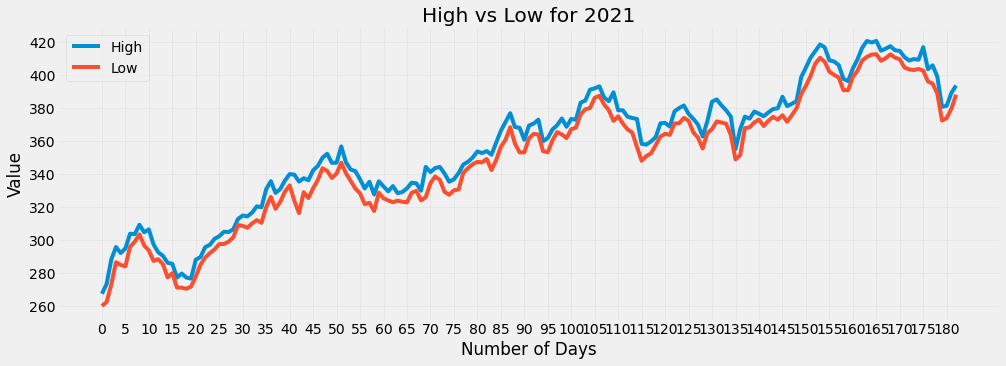

#### Distribution Variance for High vs Low**
#####   Highest High Price: 420.76
#####   Highest Low price: 412.72
#####   Lowest High Price: 267.58
#####   Lowest Low Closing Price: 260.16
```python
print("\n\n")
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(df_filtered.Date.size)),df_filtered.Volume,label="Volume")
plt.tick_params(bottom=False,left=False)
plt.title("Sale Volume for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,df_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()
print("Peak Volume Date   : ",df_filtered[df_filtered.Volume == df_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",df_filtered[df_filtered.Volume == df_filtered.Volume.min()].Date.values[0])
```
### *Plot Close Price from 1999 to 2021*
```python
df.shape
plt.figure(figsize=(16,8))
plt.title('GS Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Prise USD($)', fontsize=18)
plt.show()
data = df.filter(['Close'])
```
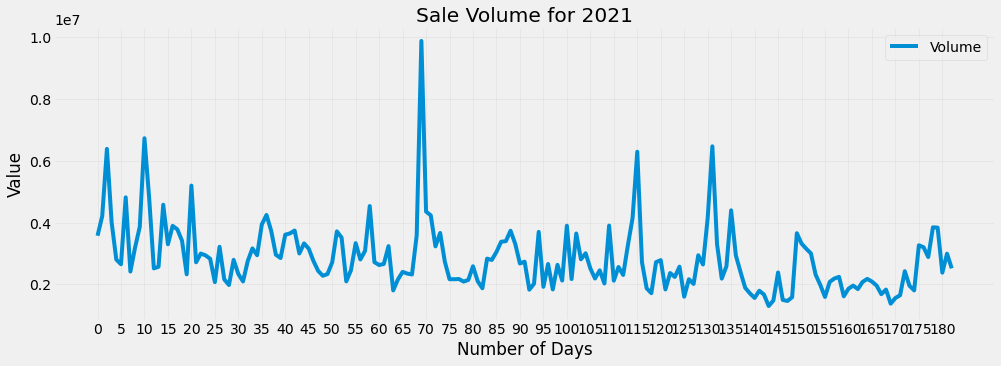
### Convert df to numpy array
```python
dataset = data.values
training_data_length = math.ceil(len(dataset)*0.8)
```
##### Scale the data
#### Convert the x_train and y_train into numpy array
#### Reshape the data 

```python
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
train_data = scaled_data[0:training_data_length, :]
x_train = [] # Independent variables
y_train = [] # target variable (dependent)
for i in range(180, len(train_data)):
  x_train.append(train_data[i-180:i,0])
  y_train.append(train_data[i,0])
  if i<= 180:
    print(x_train)
    print(y_train)
    print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape
```

# *Build the LSTM model*
```python
model = Sequential()
model.add(LSTM(50,  return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
```
#### *Compile the model*
```model.compile(optimizer='adam', loss='mean_squared_error')```
### This model takes 180 previous days in order to predict Goldman Sachs stock price.
#### One of the limitations of this model is that only gives predictions for one day, rather then long term trend.
#### On the screenshot below, first vector contqins values used to predict value of the second vector, that contains only one value.
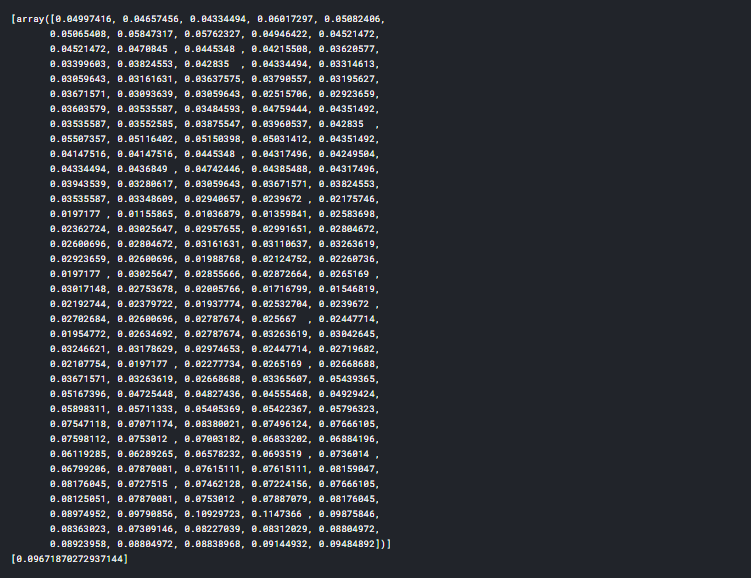
#### *Train the model*
`model.fit(x_train, y_train, batch_size=1, epochs=1)`

#### *Create the testing data set*
#### Create a new array, containing scaled values 
```python
test_data = scaled_data[training_data_length - 180:,:]
x_test = []
y_test =dataset[training_data_length:,:]
for i in range(180, len(test_data)):
  x_test.append(test_data[i-180:i,0])
x_test = np.array(x_test)
x_test.shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
```
#### *Get predictions made by a model*
``
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
``

#### *Evaluate model: RMSE - room mean squared error (lower -> better)*
```python
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(rmse)

train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8),)
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('GS Close Price in USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Predictions'], loc='lower right')
plt.show()
```
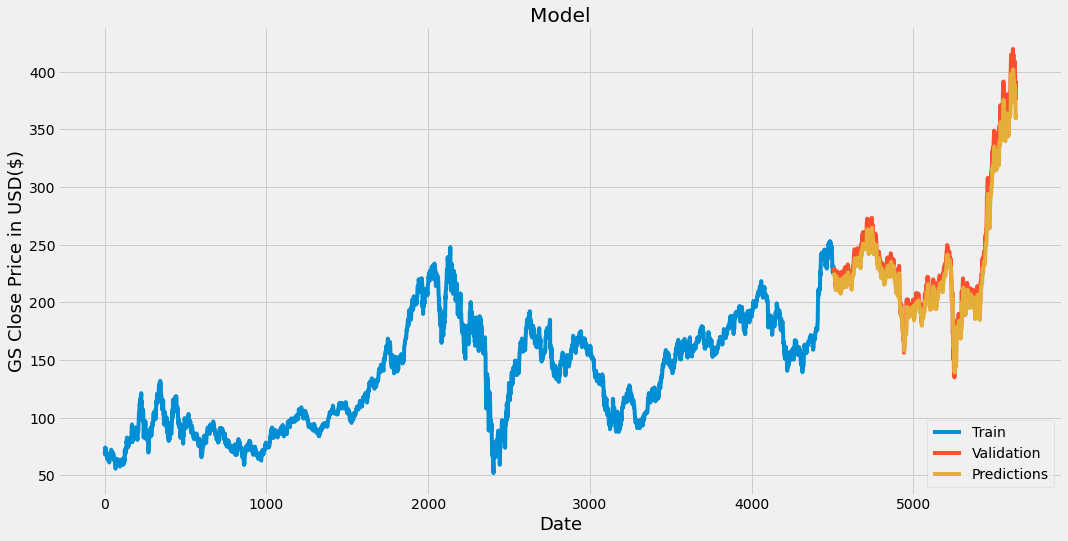
#### *Showe the actual price against predicted price*
print(valid)
model.summary()
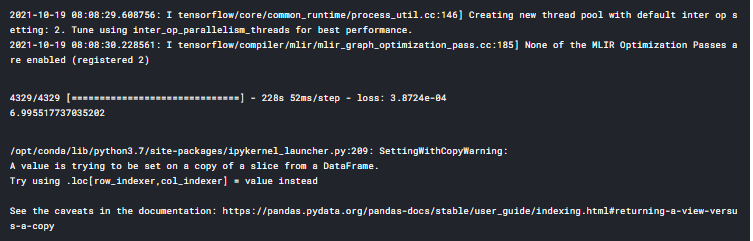

#### *Conclusion*: I have performed a simple data analysis of GS Stock Price during the year 2021. After, getting to know the dataset better I have used Closing prie to create an LSTM model with several layers. The aim of the model was to relatively accurately predict Goldman Sachs Stock Price. It is important to mention that this is my first project of such kind. I have gotten interested in Data Science this summer and looking for opportunities to learn. This project allowed me to better understand, the importance of Data Cleaning and Data Pre-processing. As well as, the value of plots and summary tables when it comes to fundamental understanding of the given dataset. I also was able to learn basics of the Machine Learning, specifically how to prepare data, by splitting the original dataset into testing and training subsets. Obviously, my model is not reliable enough to be used as an accurate stock price predictor. However, it is quite exciting to be able to use Machine Learning to perform Time Series Analysis and achieve meaningful results. I have tried my best to explain each step of this code. 
 
 